In [181]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import re

In [182]:
spisok = pd.read_excel("/Users/dmitrij/Desktop/hackspb/Список сотрудников КРОК.xlsx")
zarabotok = pd.read_csv("/Users/dmitrij/Desktop/hackspb/NEW Как зарабатывают бобров КРОК.csv", sep=";")
pokupki = pd.read_csv("/Users/dmitrij/Desktop/hackspb/Покупки сотрудников в боброшопе.csv", sep=";")

In [183]:
def months(staj):
    match = re.findall(r'(\d+)', staj)
    if len(match) == 3:
        years, months, days = map(int, match)
        total_months = years * 12 + months + (days // 30)
        return total_months
    return None

spisok['months_total'] = spisok["Стаж фактический по компании"].apply(months)

zarabotok['Fact_dep'] = zarabotok['Департамент'].str.split('.').str[0]
zarabotok


,Код сотрудника,Департамент,Сумма вознаграждения,Название миссии,Контейнер,Дата,Комментарий,Fact_dep
0,SU147663,ДБП.группа консультантов по автоматизации бизн...,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,06.02.2024,За неделю 29.01-04.02,ДБП
1,SU76490,ДВА.группа автоматизации производственных проц...,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,24.01.2024,За неделю 15.01-21.01,ДВА
2,SU69215,ДИРС.группа инженеров по ИТ-инфраструктуре и м...,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,29.07.2024,За неделю 15.07-21.07,ДИРС
3,SU4528,Служба охраны.группа обеспечения контрольно-пр...,5.0,Ты угадал коллегу в Jive с первого раза,Корпоративная жизнь КРОК,02.05.2024,NaN,Служба охраны
4,SU163517,ДРП.отдел кадров,5.0,Ты угадал коллегу в Jive с первого раза,Корпоративная жизнь КРОК,06.09.2024,NaN,ДРП
...,...,...,...,...,...,...,...,...
94877,SU190343,ДВА.группа разработки инфраструктурных приложений,5.0,Ты угадал коллегу в Jive с первого раза,Корпоративная жизнь КРОК,11.04.2024,NaN,ДВА
94878,SU44113,ДВА.группа разработки 1С,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,02.10.2024,За неделю 16.09 - 22.09,ДВА
94879,SU173704,ДТК.Цифровое производство.группа инженеров циф...,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,06.02.2024,За неделю 29.01-04.02,ДТК
94880,SU43534,"ДРПО.Практика ""Роботехника"".группа разработки ...",200.0,"Плюс один год, как ты в команде КРОК!",Я и КРОК,04.03.2024,NaN,ДРПО


In [184]:
gender_dict = dict(zip(spisok['Внешний код'], spisok['Пол']))

# Добавляем столбец с полом в первый датафрейм
zarabotok['gender'] = zarabotok['Код сотрудника'].map(gender_dict)


,Внешний код,Факт. департамент,Факт. подразделение,Факт. группа,Факт. должность,Является РМ/ТЛ,Стаж фактический по компании,Пол,Возраст,months_total,zarab_bobor
0,SU181063,Департамент внутренней автоматизации,NaN,центральная служба технической поддержки,Инженер технической поддержки,нет,"2 г., 9 мес.,12 дн.",Мужской,23,33,2500.0
1,SU198055,Департамент разработки программного обеспечения,Государственные информационные системы,суды. группа разработчиков,Инженер-разработчик,нет,"0 г., 9 мес.,15 дн.",Женский,25,9,NaN
2,SU158012,Департамент инфраструктурных решений и сервисов,группа инженеров технической поддержки,NaN,Старший инженер технической поддержки,нет,"3 г., 8 мес.,9 дн.",Мужской,34,44,NaN
3,SU196620,Департамент телекоммуникаций,NaN,Группа поддержки продаж сетевых решений,Менеджер по работе с партнерами,нет,"1 г., 5 мес.,10 дн.",Женский,29,17,1115.0
4,SU160331,Департамент разработки программного обеспечения,Государственные информационные системы,суды. группа разработчиков,Инженер-разработчик,нет,"3 г., 7 мес.,10 дн.",Мужской,27,43,400.0
...,...,...,...,...,...,...,...,...,...,...,...
3294,SU2674,Департамент продаж и менеджмента проектов,NaN,группа продаж,Директор по комплексным продажам,нет,"17 г., 1 мес.,8 дн.",Мужской,38,205,NaN
3295,SU199667,Департамент инженерных и мультимедийных систем,Группа СКС и Автоматизации инженерных систем,NaN,Стажер,нет,"0 г., 1 мес.,22 дн.",Женский,21,1,NaN
3296,SU2728,Транспортный отдел,NaN,Группа обслуживания и сервиса,Водитель,нет,"25 г., 4 мес.,24 дн.",Мужской,51,304,NaN
3297,SU3864,Служба охраны,NaN,Группа обеспечения контрольно-пропускного режима,Охранник,нет,"15 г., 9 мес.,24 дн.",Мужской,47,189,NaN


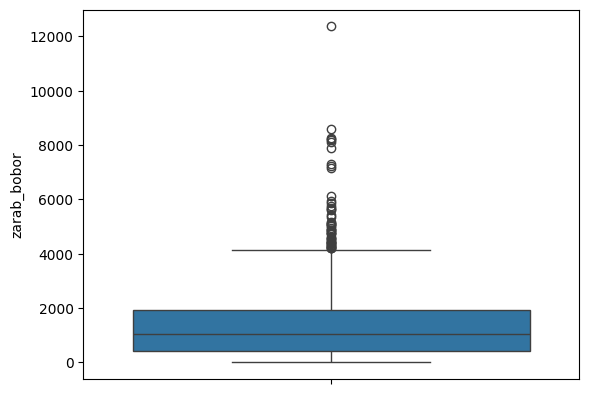

In [185]:
gender_dict = dict(zip(zarabotok['Код сотрудника'], zarabotok.groupby(["Код сотрудника"])['Сумма вознаграждения'].sum()))

# Добавляем столбец с полом в первый датафрейм
spisok['zarab_bobor'] = spisok['Внешний код'].map(gender_dict)


spisok

sns.boxplot(y=spisok["zarab_bobor"])


df = spisok[spisok["zarab_bobor"] > 5000]

res = spisok.groupby("Пол")["zarab_bobor"].median()

spisok["zarab_bobor"].quantile(0.75)
spisok["zarab_bobor"].quantile(0.25)

# 4213 это 75 квартиль плюс 1.5 меж квартильных размаха
spisok

In [187]:

pokupki["Наименование товара"].value_counts().head(20)


Наименование товара
Кофе КРОК                                4038
Кофе коллеге                             1692
Лотерейный билет "Надо собраться"        1406
Внешний аккумулятор Xiaomi                810
Подписка Яндекс плюс                      788
Лотерея на Кофемашину                     752
 Welcome-набор с кружкой и футболкой      722
 Welcome-набор с чехлом и футболкой       602
Худи КРОК Hard                            593
Черный лотерейный билет КРОК              582
Футболка КРОК Hard                        563
Лотерейный билет "Алиса"                  531
Лотерея на мерч SOFT&HARD '24             525
Носки Soft&Hard                           516
Ежедневник                                515
Худи КРОК                                 493
Лотерея на Черные Пуфы                    474
Боброклад                                 460
Футболка КРОК Soft                        453
Картхолдер                                435
Name: count, dtype: int64

In [189]:

def lot(str):
    if str.startswith("Лоте") or str.startswith("Черный"):
        return "Лотерея"
    elif str.startswith("Кофе"):
        return "Кофе"
    else:
        return str


pokupki['tovar'] = pokupki["Наименование товара"].apply(lot)


pokupki

,Дата оформления заказа,Код сотрудника,Департамент,Наименование товара,Стоимость в валюте,Скидка,Количество,Категория,Статус товара,tovar
0,15.10.2024 17:16,SU162966,ДРП.HR-партнеры,Бобер-антистресс,250,0,1,Мерч и сувениры КРОК,закончился,Бобер-антистресс
1,15.10.2024 16:34,SU199359,Склад,Welcome-набор с чехлом и футболкой,0,0,1,Без категории,закончился,Welcome-набор с чехлом и футболкой
2,15.10.2024 16:31,SU180088,Отдел дизайна,Олимпийка SOFT `24,0,100,1,В стиле КРОК,на витрине,Олимпийка SOFT `24
3,15.10.2024 16:02,SU198080,ДИРС.группа пресейл-инженеров,Побег из города,0,0,1,Без категории,закончился,Побег из города
4,15.10.2024 15:56,SU198606,ДИРС.группа инженеров по инфраструктурному ПО,Бобер-антистресс,250,0,1,Мерч и сувениры КРОК,закончился,Бобер-антистресс
...,...,...,...,...,...,...,...,...,...,...
37184,23.09.2019 7:16,SU116489,ДВА.центральная служба технической поддержки,"Термокружки ""CROC IT NOW"" на выбор",700,0,1,В стиле КРОК,закончился,"Термокружки ""CROC IT NOW"" на выбор"
37185,22.09.2019 16:14,SU69130,Отдел дизайна,Фикус,1500,0,1,Прокачай эффективность,закончился,Фикус
37186,22.09.2019 16:11,SU69130,Отдел дизайна,"Термокружки ""CROC IT NOW"" на выбор",700,0,1,В стиле КРОК,закончился,"Термокружки ""CROC IT NOW"" на выбор"
37187,22.09.2019 16:10,SU69130,Отдел дизайна,"Журнал ""Harvard Bisiness Review""",800,0,1,Сервис,закончился,"Журнал ""Harvard Bisiness Review"""
